# Hierarchical Clustering
In this notebook we will give a basic example of how agglomerative hierarchical cluster works. 
We use scipy and sklearn libraries. 

In [0]:
from sklearn.metrics import normalized_mutual_info_score
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.datasets.samples_generator import make_blobs
import numpy as np 

# Generating Sample data
 `make_blobs` is used to generate sample data where:
 

`n_samples`        :  the total number of points equally divided among clusters.

`centers`           :  the number of centers to generate, or the fixed center locations.

`n_features`     : the number of features for each sample. 

`random_state`: determines random number generation for dataset creation.



This function returns two outputs: 

`X`:   the generated samples. 

`y`:   The integer labels for cluster membership of each sample. 

Then we use `plt.scatter` to plot the data points in the figure below.



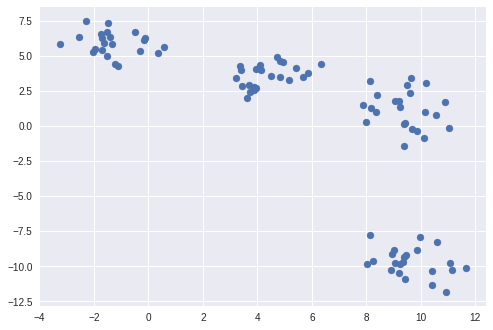

In [0]:
X, y = make_blobs(n_samples=90, centers=4, n_features=3, random_state=4)
plt.scatter(X[:, 0], X[:, 1])
plt.show()

# Performing Hierarchical clustering: 
In this part, we are performing agglomerative hierarchical clustering using linkage function from scipy library:: 

`method`: is the linkage method, 'single' means the linkage method will be single linkage method. 

`metric`: is our similarity metric, 'euclidean' means the metric will be euclidean distance. 

"A  `(n-1)` by 4 matrix `Z` is returned. At the -th iteration, clusters with indices `Z[i, 0]` and `Z[i, 1]` are combined to form cluster with index `(n+i)` . A cluster with an index less than `n` corresponds to one of the `n` original observations. The distance between clusters `Z[i, 0]` and `Z[i, 1]` is given by `Z[i, 2]`. The fourth value `Z[i, 3]` represents the number of original observations in the newly formed cluster.

The following linkage methods are used to compute the distance `d(s,t)`between two clusters `s`and `t`. The algorithm begins with a forest of clusters that have yet to be used in the hierarchy being formed. When two clusters `s` and `t`from this forest are combined into a single cluster `u`, `s`and `t` are removed from the forest, and `u` is added to the forest. When only one cluster remains in the forest, the algorithm stops, and this cluster becomes the root.

A distance matrix is maintained at each iteration. The `d[i,j]`` entry corresponds to the distance between cluster `ii` and `j` in the original forest.

At each iteration, the algorithm must update the distance matrix to reflect the distance of the newly formed cluster u with the remaining clusters in the forest."


For more details check the docmentation of linkage: https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html


In [0]:
Z = linkage(X, method="single", metric="euclidean")
print(Z.shape)
Z

(89, 4)


array([[1.90000000e+01, 8.60000000e+01, 1.30442991e-01, 2.00000000e+00],
       [1.00000000e+00, 2.90000000e+01, 1.82464805e-01, 2.00000000e+00],
       [2.60000000e+01, 4.10000000e+01, 2.24296317e-01, 2.00000000e+00],
       [3.40000000e+01, 9.10000000e+01, 2.58407755e-01, 3.00000000e+00],
       [1.70000000e+01, 8.80000000e+01, 4.46261329e-01, 2.00000000e+00],
       [3.00000000e+00, 2.80000000e+01, 4.59526997e-01, 2.00000000e+00],
       [8.00000000e+00, 9.30000000e+01, 4.70577188e-01, 4.00000000e+00],
       [6.40000000e+01, 7.00000000e+01, 4.85796818e-01, 2.00000000e+00],
       [6.80000000e+01, 9.70000000e+01, 5.52673653e-01, 3.00000000e+00],
       [2.20000000e+01, 7.10000000e+01, 5.67637608e-01, 2.00000000e+00],
       [4.80000000e+01, 5.20000000e+01, 5.72218127e-01, 2.00000000e+00],
       [2.70000000e+01, 9.20000000e+01, 5.83346355e-01, 3.00000000e+00],
       [7.70000000e+01, 9.00000000e+01, 5.88123667e-01, 3.00000000e+00],
       [4.50000000e+01, 9.50000000e+01, 6.06112007e

# Plotting dendrogram 
The dedrogram function from scipy is used to plot dendrogram: 



*   On the `x` axis we see the indexes of our samples. 
*   On the `y` axis we see the distances of our metric ('Euclidean'). 





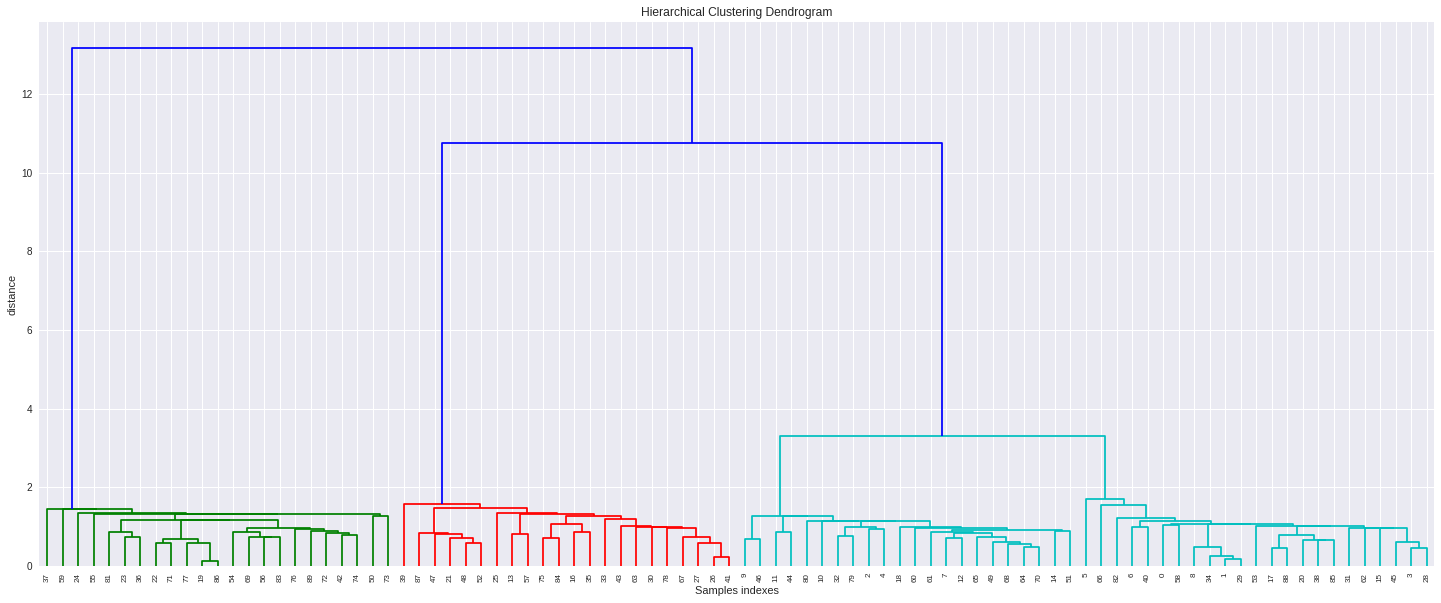

In [0]:
plt.figure(figsize=(25, 10))
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Samples indexes")
plt.ylabel("distance")
dendrogram(Z, leaf_rotation=90., leaf_font_size=8. ) 
plt.show()

# Retrive the clusters
`fcluster` is used to retrive clusters with some level of distance. 

The number two determines the distance in which we want to cut the dendrogram. The number of crossed line is equal to number of clusters. 

In [0]:
cluster = fcluster(Z, 2, criterion="distance")
cluster

array([4, 4, 3, 4, 3, 4, 4, 3, 4, 3, 3, 3, 3, 2, 3, 4, 2, 4, 3, 1, 4, 2,
       1, 1, 1, 2, 2, 2, 4, 4, 2, 4, 3, 2, 4, 2, 1, 1, 4, 2, 4, 2, 1, 2,
       3, 4, 3, 2, 2, 3, 1, 3, 2, 4, 1, 1, 1, 2, 4, 1, 3, 3, 4, 2, 3, 3,
       4, 2, 3, 1, 3, 1, 1, 1, 1, 2, 1, 1, 2, 3, 3, 1, 4, 1, 2, 4, 1, 2,
       4, 1], dtype=int32)

# Plotting Clusters
Plotting the final result. Each color represents a different cluster (four clusters in total).

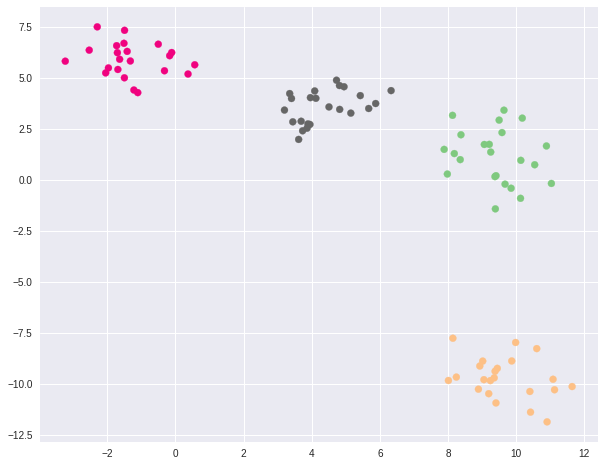

In [0]:
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=cluster, cmap="Accent")
plt.savefig("clusters.png")
plt.show()

# Evaluting clusters: 
Finally we will use Normalized Mutual Information (NMI) score to evaluate our clusters. Mutual information is a symmetric measure for the degree of dependency between the clustering and the manual classification. When NMI value is close to one, it indicates high similarity between clusters and actual labels. But if it was close to zero, it indicates high dissimilarity between them. 

In [0]:
normalized_mutual_info_score(y, cluster)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


1.0